# 性能优化

In [25]:
import numpy as np
from utils import read_black_and_white_file
import matplotlib.pyplot as plt

## 识别结果二值化

In [16]:
a = np.array([[1, 2], [3, 4]])
print(a)

[[1 2]
 [3 4]]


In [17]:
a = a.repeat(2, axis=0).repeat(2, axis=1)
print(a)

[[1 1 2 2]
 [1 1 2 2]
 [3 3 4 4]
 [3 3 4 4]]


## 黑帧稳定性测试

### 开机后短时间内黑帧变化

In [20]:
root_dir = r"F:\\zhouchao\\white_black_change\\"
file_names = [root_dir + file_name for file_name in ["black1", "black2", "black3"]]

In [32]:
black1 = read_black_and_white_file(file_names[0]).reshape((1024, 448)).T
black2 = read_black_and_white_file(file_names[1]).reshape((1024, 448)).T
black3 = read_black_and_white_file(file_names[2]).reshape((1024, 448)).T

In [33]:
print(black1.shape)

(448, 1024)


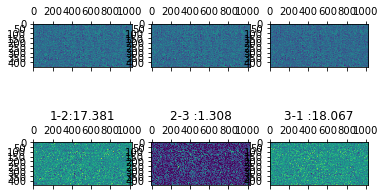

In [41]:
fig, axs = plt.subplots(2, 3)
axs[0, 0].matshow(black1)
axs[0, 1].matshow(black2)
axs[0, 2].matshow(black3)
axs[1, 0].matshow(np.abs(black1-black2))
error1 = np.sum(np.sum(np.abs(black1- black2)))/488/1024
axs[1,0].set_title(f"1-2:{error1:.3f}")
axs[1, 1].matshow(np.abs(black2-black3))
error2 = np.sum(np.sum(np.abs(black2- black3)))/488/1024
axs[1,1].set_title(f"2-3 :{error2:.3f}")
axs[1, 2].matshow(np.abs(black3-black1))
error3 = np.sum(np.sum(np.abs(black3- black1)))/488/1024
axs[1,2].set_title(f"3-1 :{error3:.3f}")
plt.show()

### 多次开机后黑帧的变化

In [51]:
root_dir = r"F:\\zhouchao\\white_black_change\\"
file_names = [root_dir + file_name for file_name in ["black1", "black21", "black31", "black4"]]

In [52]:
black1 = read_black_and_white_file(file_names[0]).reshape((1024, 448)).T
black21 = read_black_and_white_file(file_names[1]).reshape((1024, 448)).T
black31 = read_black_and_white_file(file_names[2]).reshape((1024, 448)).T
black4 = read_black_and_white_file(file_names[3]).reshape((1024, 448)).T

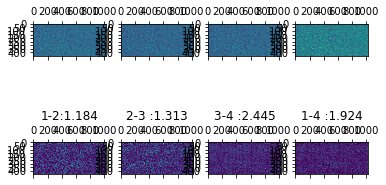

In [53]:
fig, axs = plt.subplots(2, 4)
axs[0, 0].matshow(black1)
axs[0, 1].matshow(black21)
axs[0, 2].matshow(black31)
axs[0, 3].matshow(black4)
axs[1, 0].matshow(np.abs(black1-black21))
error1 = np.sum(np.sum(np.abs(black1- black21)))/488/1024
axs[1,0].set_title(f"1-2:{error1:.3f}")
axs[1, 1].matshow(np.abs(black21-black31))
error2 = np.sum(np.sum(np.abs(black21- black31)))/488/1024
axs[1,1].set_title(f"2-3 :{error2:.3f}")
axs[1, 2].matshow(np.abs(black31-black4))
error3 = np.sum(np.sum(np.abs(black31- black4)))/488/1024
axs[1,2].set_title(f"3-4 :{error3:.3f}")
axs[1, 3].matshow(np.abs(black1-black4))
error3 = np.sum(np.sum(np.abs(black1- black4)))/488/1024
axs[1,3].set_title(f"1-4 :{error3:.3f}")
plt.show()

### 采集数据前后黑帧的变化

In [48]:
root_dir = r"F:\\zhouchao\\white_black_change\\"
file_names = [root_dir + file_name for file_name in ["black3", "black_after_white"]]

In [49]:
black3 = read_black_and_white_file(file_names[0]).reshape((1024, 448)).T
black_w1 = read_black_and_white_file(file_names[1]).reshape((1024, 448)).T

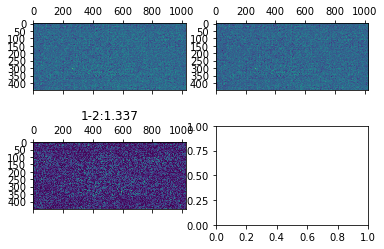

In [50]:
fig, axs = plt.subplots(2, 2)
axs[0, 0].matshow(black3)
axs[0, 1].matshow(black_w1)
axs[1, 0].matshow(np.abs(black3-black_w1))
error1 = np.sum(np.sum(np.abs(black3- black_w1)))/488/1024
axs[1,0].set_title(f"1-2:{error1:.3f}")
plt.show()